## Import

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

### Loading the Iris Dataset

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Data contains:', iris.keys())

# Extracting Features & Labels
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names) 
df_iris['label'] = y

# Mapping Numeric Labels to Class Names
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

Data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Statistical Summary of the Data

In [25]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking Class Distribution

In [26]:
df_iris.groupby('label_names').size()

label_names
setosa        50
versicolor    50
virginica     50
dtype: int64

### Pair Plot Visualization

<Figure size 640x480 with 0 Axes>

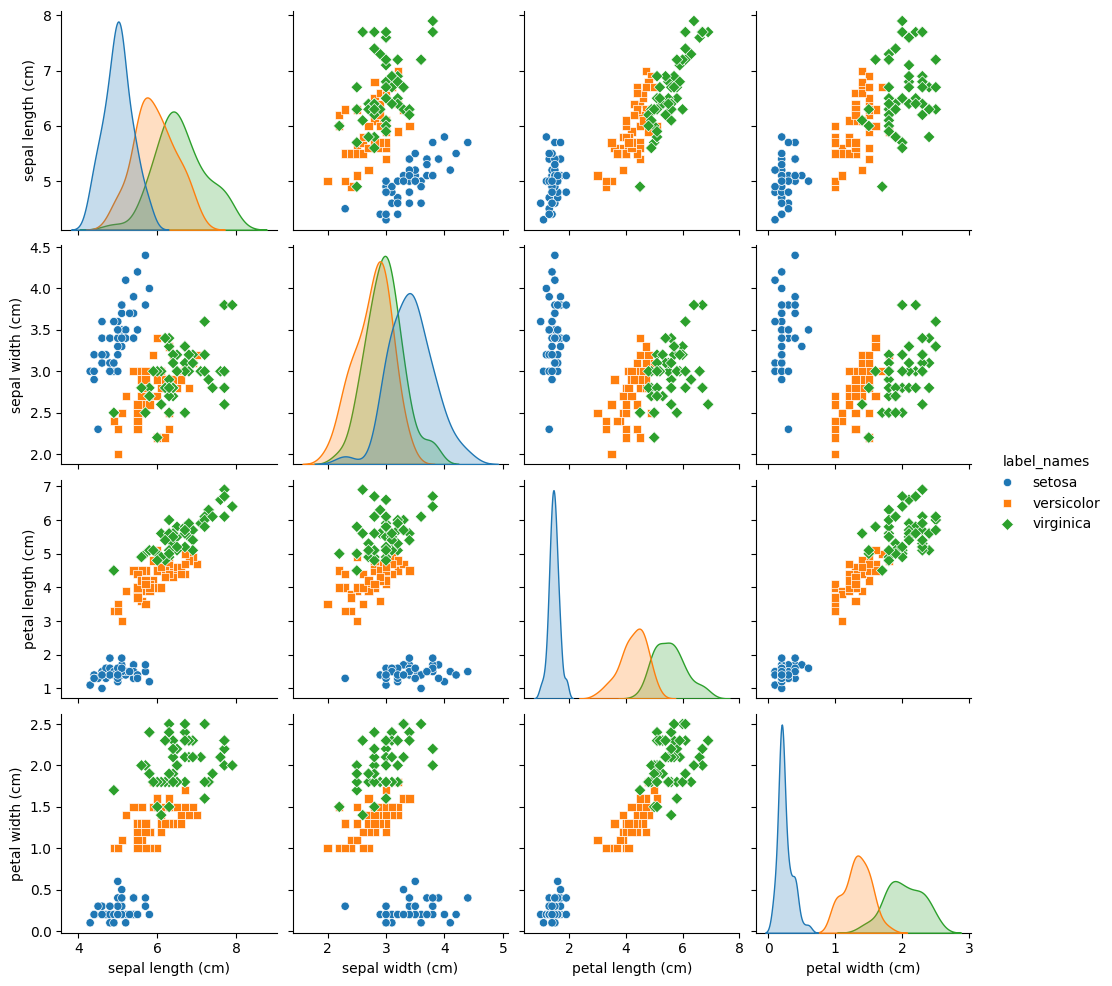

In [27]:
plt.figure()
sns.pairplot(df_iris.drop("label", axis=1), hue="label_names", markers=["o", "s", "D"])
plt.show()


- Pairplot visualizes relationships between numerical features

### Box Plot Analysis

<Figure size 640x480 with 0 Axes>

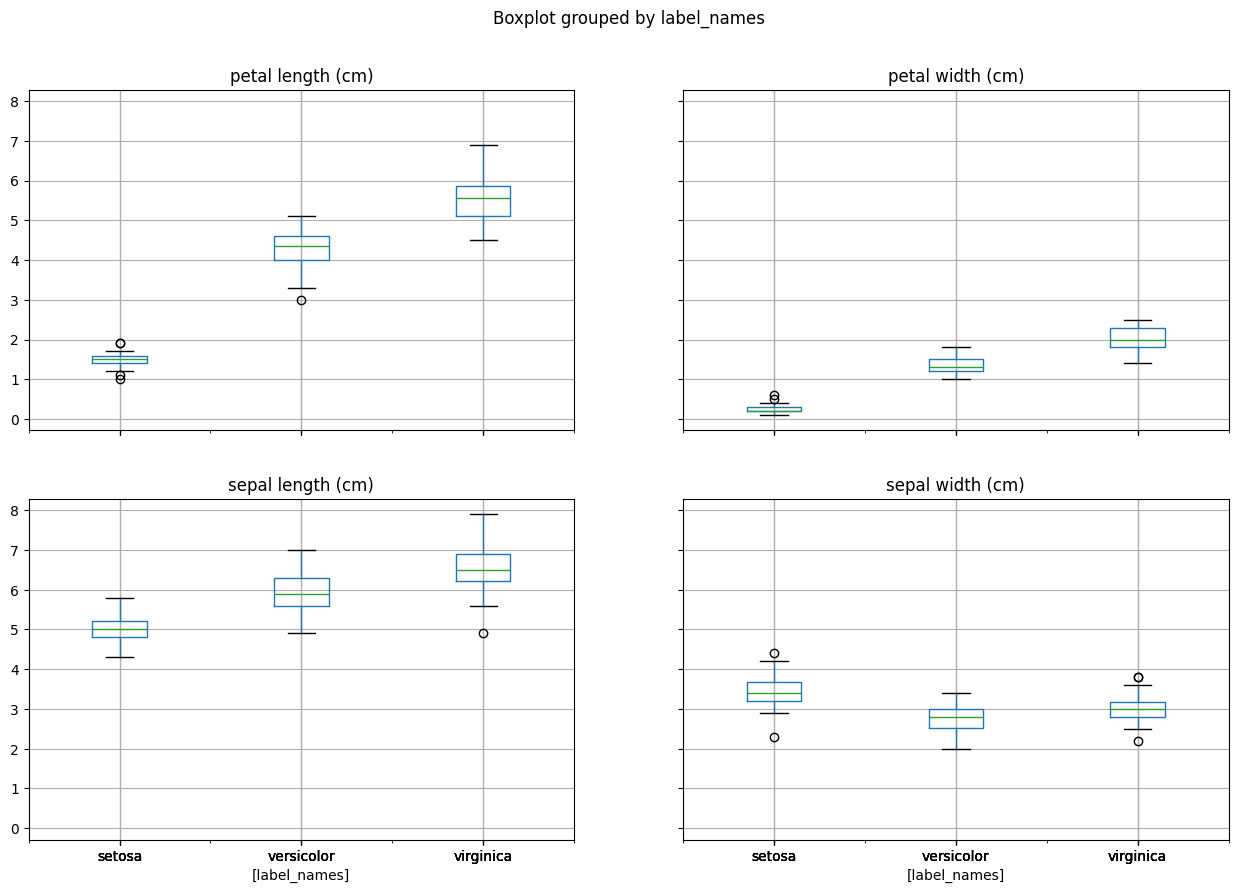

In [28]:
plt.figure()
df_iris.drop("label", axis=1).boxplot(by="label_names", figsize=(15, 10))
plt.show()

### Splitting the Dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2025)

### Feature Scaling

In [30]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Uses Min-Max Scaling to normalize features between 0 and 1.
- Fits the scaler on training data and applies it to both training and test sets.

### `Import custom functions`

In [31]:
from knn_classifier import evaluate_knn
help(evaluate_knn)

Help on function evaluate_knn in module knn_classifier:

evaluate_knn(X_train, X_test, y_train, y_test, k_max=20)
    Trains and evaluates KNN classifiers for different values of k.

    Parameters:
    - X_train, X_test: Scaled training and test features
    - y_train, y_test: Corresponding labels
    - k_max: The maximum value of k to evaluate

    Returns:
    - k_list: List of tested k values
    - cv_scores: List of accuracy scores for each k
    - best_k: The optimal k value
    - best_score: The highest accuracy achieved



In [32]:
from knn_classifier import plot_knn_results
help(plot_knn_results)

Help on function plot_knn_results in module knn_classifier:

plot_knn_results(k_list, cv_scores, best_k, best_score)
    Plots misclassification error for different k values in KNN.

    Parameters:
    - k_list: List of k values
    - cv_scores: Corresponding accuracy scores
    - best_k: The best k value
    - best_score: The highest accuracy achieved

     Returns:
    - None: Plots misclassification error for different k values in KNN.



### Training KNN with Custom Function for Different k Values

In [33]:
# Calls the custom evaluate_knn function to train KNN with different k values 
k_list, cv_scores, best_k, best_score = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test)

### `The Best k`

In [34]:
print('The best k = {} , score = {}'.format(best_k, best_score))

The best k = 7 , score = 0.9736842105263158


###  Plotting Misclassification Error

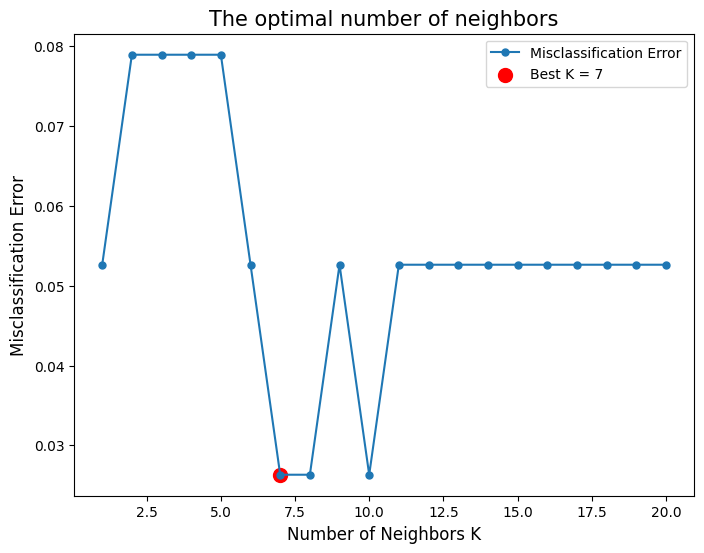

In [35]:
# Calls the custom plot_knn_results function to visualize the misclassification error 
# for different k values and highlight the best k value.
plot_knn_results(k_list, cv_scores, best_k, best_score)

##  `Synthetic dataset`

 ### Generating the Dataset

In [36]:
np.random.seed = 2021
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8,
                         cluster_std=1.3, random_state=4)

y_D2 = y_D2 % 2

- Generates a dataset with 300 samples, 2 features, and 8 clusters.
- Adds some randomness by setting cluster_std=1.3.

### Visualizing the Data

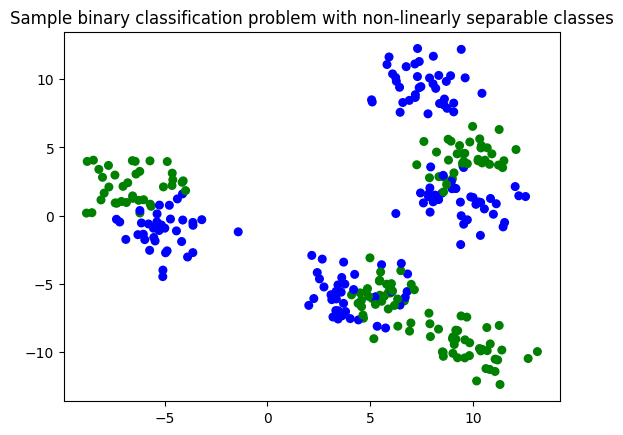

In [37]:
plt.figure()
cmap_bold = ListedColormap(['blue', '#FFFF00', 'black', 'green'])
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.show()


### Splitting the Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0) # Divides the dataset into training and test sets.

### Feature Scaling

In [39]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Uses Min-Max Scaling to normalize features between 0 and 1.
- Fits the scaler on training data and applies it to both training and test sets.

### `Import custom function`

In [40]:
from knn_classifier import plot_knn_decision_boundary
help(plot_knn_decision_boundary)

Help on function plot_knn_decision_boundary in module knn_classifier:

plot_knn_decision_boundary(X_train, y_train, X, y, k)
    Visualizes the decision boundary for a KNN classifier.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X: Data features (for plotting)
    - y: Data labels (for plotting)
    - k: Number of neighbors for KNN

    Returns:
    - None: Plots the decision boundary and the data points.



### Training KNN with Different k Values

In [41]:
# Calls the custom evaluate_knn function to train KNN with different k values 
k_list, cv_scores, best_k, best_score = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test) 

### `The Best k`

In [42]:
print('The best k = {} , score = {}'.format(best_k, best_score))

The best k = 18 , score = 0.9466666666666667


###  Plotting Misclassification Error

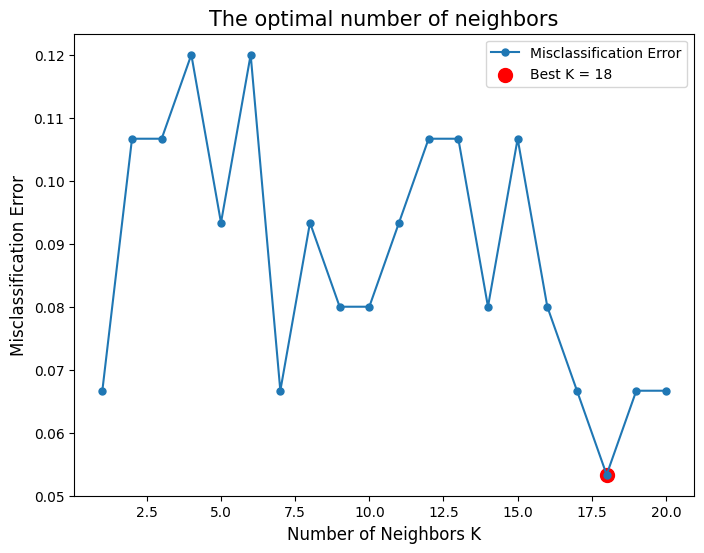

In [43]:
# Calls the custom plot_knn_results function to visualize the misclassification error 
# for different k values and highlight the best k value.
plot_knn_results(k_list, cv_scores, best_k, best_score)

### Visualizing the decision boundary 

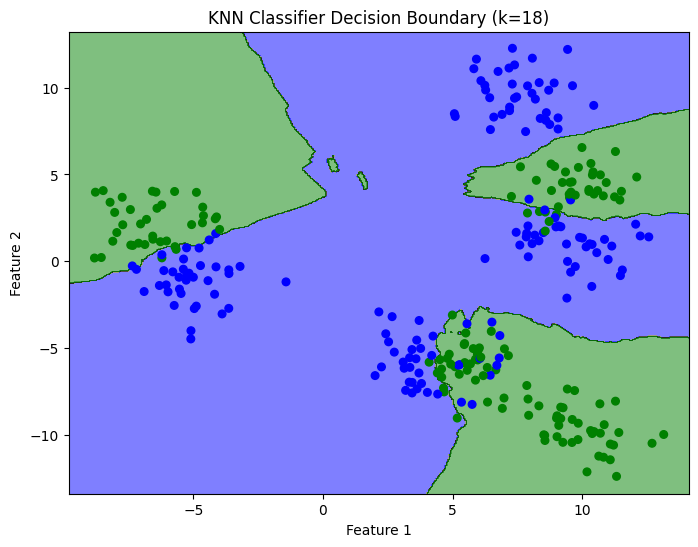

In [44]:
# Calls the custom plot_knn_decision_boundary function to visualize the decision boundary 
# of the KNN classifier with the best k value.
plot_knn_decision_boundary(X_train, y_train, X_D2, y_D2, best_k)